<a href="https://colab.research.google.com/github/Shashwat-spyder/Health-Insurance-Cross-Sell/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [76]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score,auc
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [78]:
insurance_df= pd.read_csv('/content/Drive/My Drive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [79]:
insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [80]:
insurance_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [81]:
insurance_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [82]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [83]:
df=insurance_df.copy()

# **Data Preprocessing**

Target Variable:

In [84]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

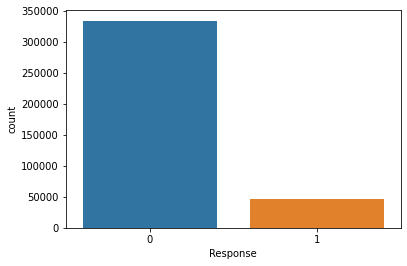

In [85]:
sns.countplot(df['Response'])

We can see that there are a lot of responses whose values are 0 where as the responses recorded as 1 contribute significantly less. Hence we can say that here exist class imbalance.

Outlier Detection and removal : 

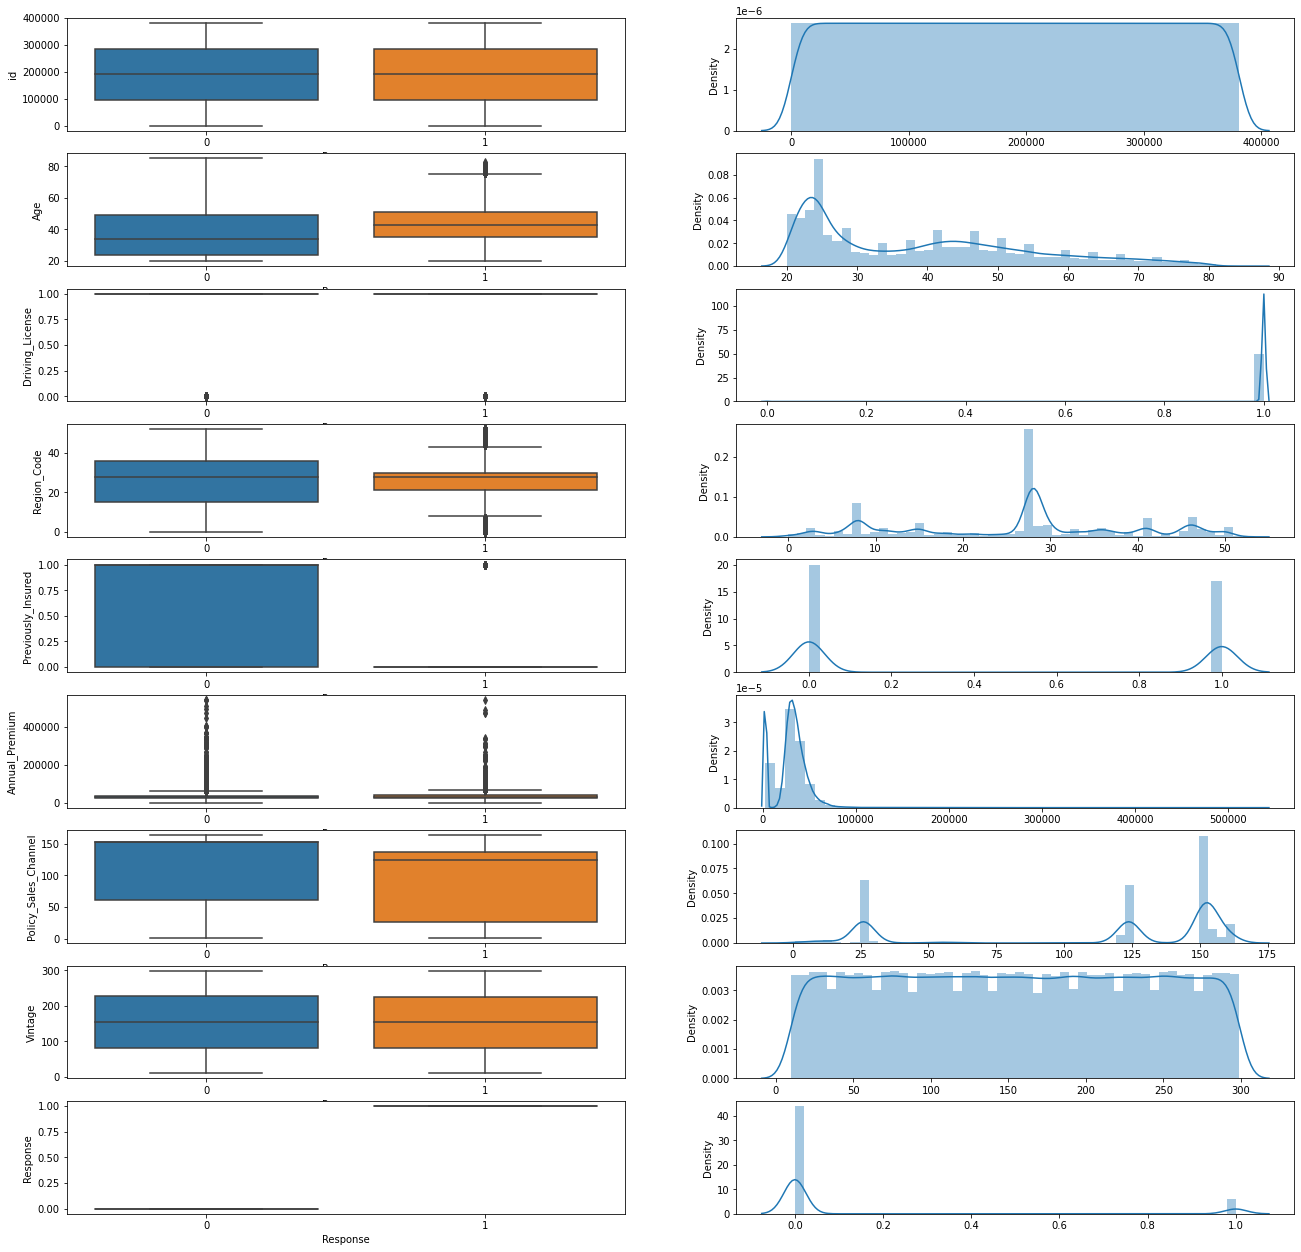

In [86]:
fig, axes= plt.subplots(9,2, figsize=(22,22))
i,j=0,0
for column in df.describe().columns:
  sns.boxplot(ax=axes[i][j],y=column,x='Response', data=df)
  sns.distplot(ax=axes[i][j+1], x=df[column])
  i+=1
  # plt.show()



*   **ID** column is uniformly distributed with subsequent discrete numbers.
*   **Age** is positively skewed with some outliers but we would not treat them as  there is no significant role of this column in model training.
*   **Driving License** is categorical variable with values taking 1 which is large in number as compared to 0 values.
*   **Regional Code** contains outliers.
*   **Previously Insured** is taking 0 and 1 values with most people not having insurance before as 0.
*   **Annual Premium** is highly positively skewed and need sto be treated.
*   **Policy Sales Channel** has fairly symmetrical shape.
*   **Vintage** is approximately uniformly distributed.









Outlier Removal :

In [87]:
print(df['Annual_Premium'].skew())

1.7660872148961309


In [88]:
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)

IQR=Q3-Q1

lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR

print(lower_whisker, upper_whisker)

df.drop(df[ (df.Annual_Premium > upper_whisker) | (df.Annual_Premium < lower_whisker) ].index , inplace=True)

1912.5 61892.5


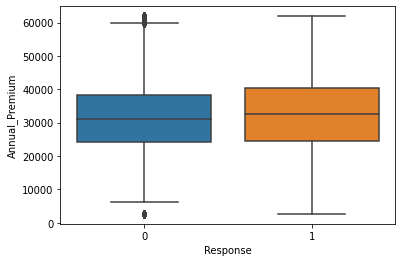

In [89]:
sns.boxplot(y='Annual_Premium',x='Response', data=df)

In [90]:
df['Annual_Premium'].skew()

-0.5196839409738611

We can see a significant decrease in skewness using the 1.5IQR outlier removal method.

# **Exploratory Data Analysis**

Univariate Analysis :

In [91]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Target Variable :

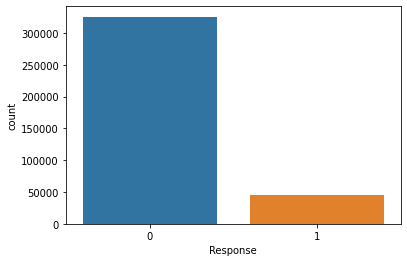

In [92]:
sns.countplot(x='Response',data=df)

We can see the number of response as 1 is less than the number of 0. This shows we have to implement class imbalance techniques.

In [93]:
def countplots_df(df):
  col=['Gender','Driving_License','Previously_Insured','Vehicle_Damage']
  fig, axes = plt.subplots(2,2,figsize=(15,12))
  sns.countplot(ax=axes[0][0], x=df['Gender'])
  sns.countplot(ax=axes[0][1], x=df['Driving_License'])
  sns.countplot(ax=axes[1][0], x=df['Previously_Insured'])
  sns.countplot(ax=axes[1][1], x=df['Vehicle_Damage'])


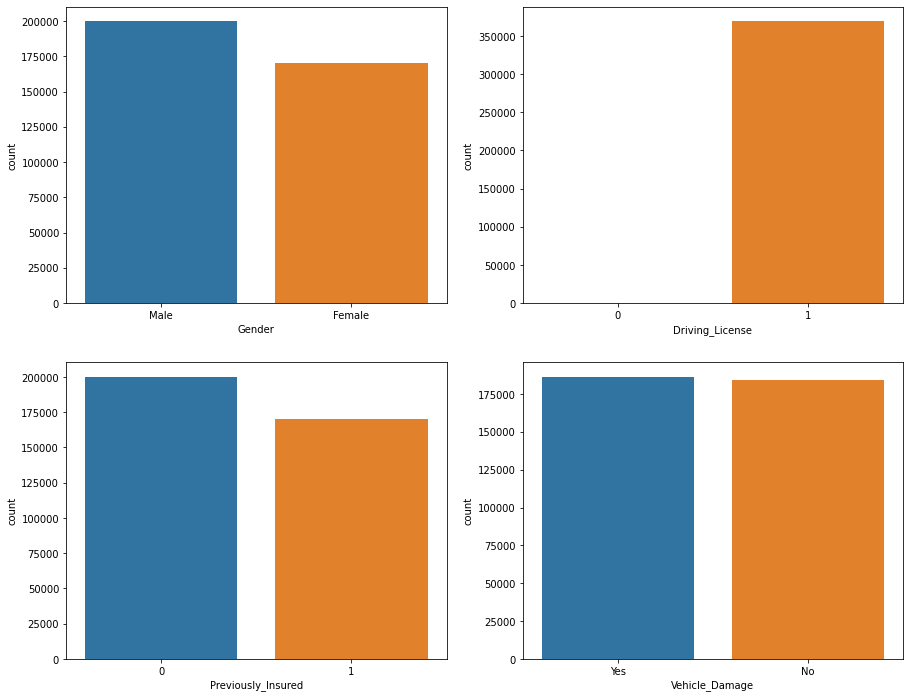

In [94]:
countplots_df(df)

Gender is divided in same manner among both. But we can see the amount to male is more than that of female.

There are a lot of people having Driving License. Only an small amount of people do not have DL.

The previously insured status is fairly distrbuted but an increasing number of people were not previously insured.

Vehicle damage is equal and may not be an criteria for insurance taking decision.

Bivariate Analysis :

In [95]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

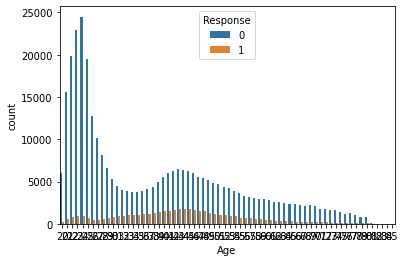

In [96]:
sns.countplot(x = 'Age', data = df, hue='Response')

In [97]:
df['Age_group']=df['Age'].apply(lambda x: 'Young' if x>=20 and x<=40 else 'Middle' if x>40 and x<=60 else 'Old')

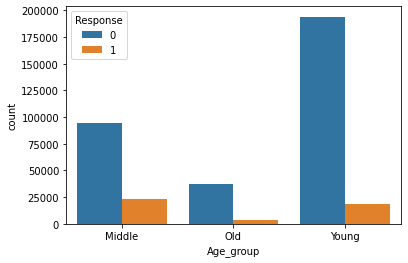

In [98]:
sns.countplot(x = 'Age_group', data = df, hue='Response')

We can infer a lot of infomation from the plot above such as:

Most number of young people own vehicle without a proper insurance.

The middle age group people has the most interest in owning an insurance.



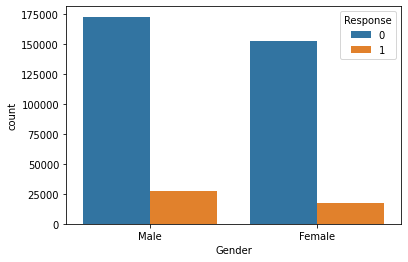

In [99]:
sns.countplot(x='Gender',data=df, hue='Response')

The male owners of car is greater than female by a slight amount.
The same can be infered about there respective interests on vehicle insurance.

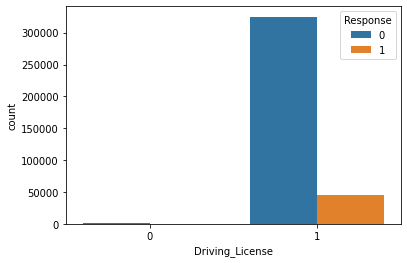

In [100]:
sns.countplot(x='Driving_License', data=df, hue='Response')

We can see that people who do not have any license are present in small amount. Also most people with driving license are not seeking health insurance.

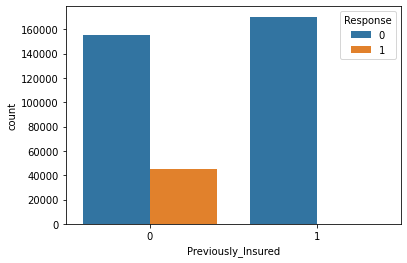

In [101]:
sns.countplot(x='Previously_Insured', data=df, hue='Response')

On one hand people who are previously insured do not have any changes in plan with regards to a new health insurance plan. On the other hand some showed there interest in having insurance for the people who are not previously insured.

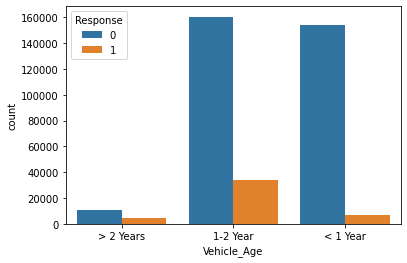

In [102]:
sns.countplot(x='Vehicle_Age', data=df, hue='Response')

There is significant rise in insurance interest among people who have between 1 to 2 year old vehicle as compared to 1 year vehicle age category. 

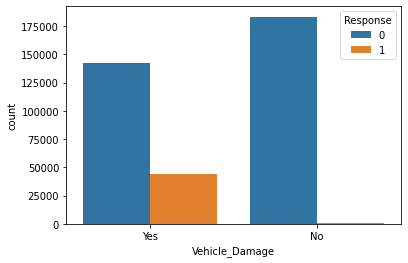

In [103]:
sns.countplot(x='Vehicle_Damage', data=df, hue='Response')

We can say that people with no previous records of damaged vehicle do not opt for health insurance. Where as we can see a fair amount of rise in interest for insurance in case of people who had damaged their vehicle in the past.

In [104]:
df_model=df.copy()
df_model = pd.get_dummies(df_model, columns = ['Age_group', 'Gender', 'Vehicle_Age', 'Vehicle_Damage'])
df_model.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group_Middle,Age_group_Old,Age_group_Young,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,0,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,0,0,1,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,0,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,0,1,0,1,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,0,1,1,0,0,1,0,1,0


Text(0.5, 1.05, 'Pearson correlation of Features')

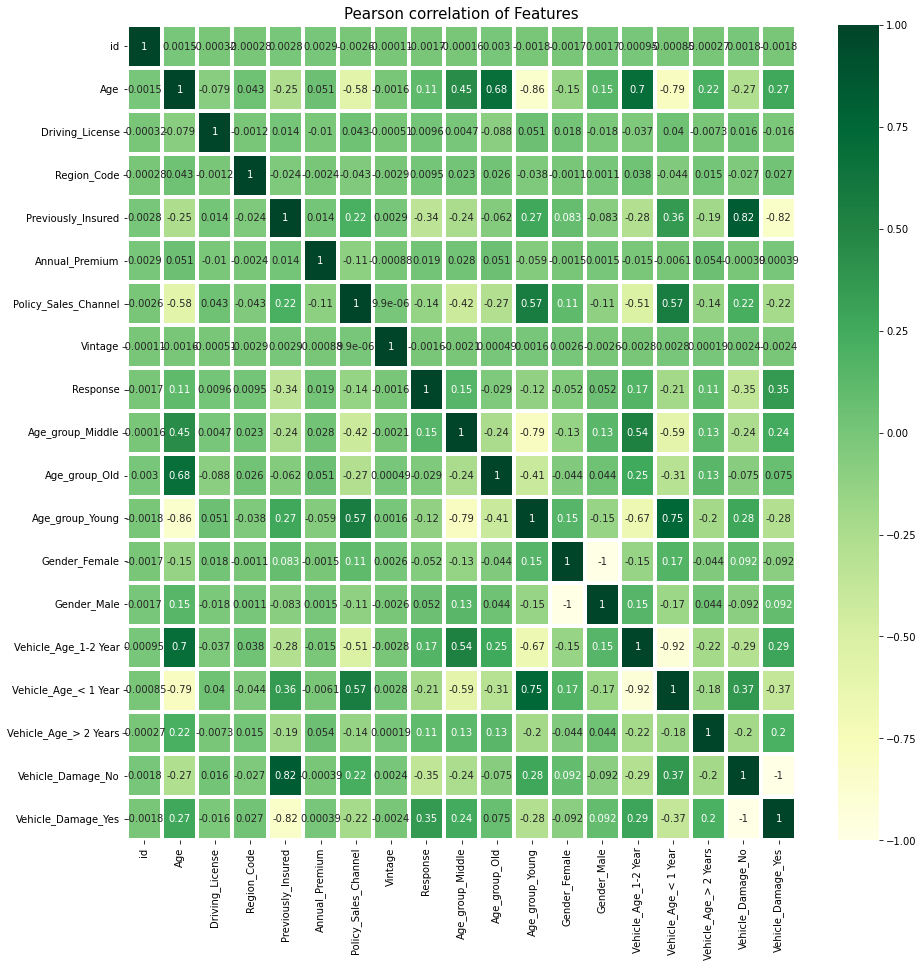

In [105]:
corr = df_model.corr()

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [106]:
duplicate=df_model[df_model.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Age, Driving_License, Region_Code, Previously_Insured, Annual_Premium, Policy_Sales_Channel, Vintage, Response, Age_group_Middle, Age_group_Old, Age_group_Young, Gender_Female, Gender_Male, Vehicle_Age_1-2 Year, Vehicle_Age_< 1 Year, Vehicle_Age_> 2 Years, Vehicle_Damage_No, Vehicle_Damage_Yes]
Index: []


In [107]:
X=df_model.drop(['Response'], axis=1)
y=df_model['Response']

[0.19208479 0.11370276 0.00042324 0.10957399 0.04164933 0.15632375
 0.07564973 0.18707359 0.0044672  0.00527334 0.00362802 0.00189501
 0.00185839 0.00735625 0.01107967 0.0021381  0.04902484 0.03679801]


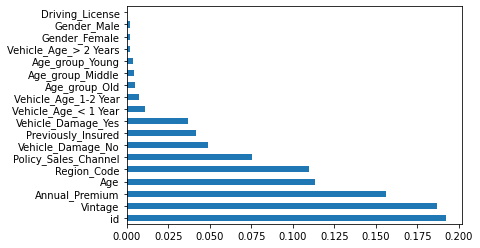

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [109]:
X=X.drop(['Driving_License','Vehicle_Age_> 2 Years', 'Gender_Female', 'Gender_Male', 'Age_group_Young','Age_group_Middle','Age_group_Old'\
          ,'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year'], axis=1)

[0.20124905 0.14536676 0.09228762 0.04547441 0.16047435 0.06927233
 0.19456692 0.04312927 0.04817929]


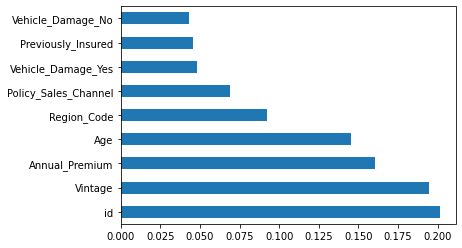

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# **Handling class imbalance**

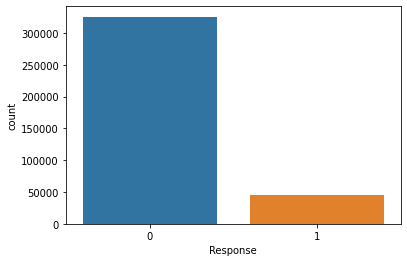

In [111]:
sns.countplot(df_model['Response'])

We can clearly see that there is an imbalance of two classes namely 1 and 0. Now we will use oversampling to make them of comparable shape. 

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


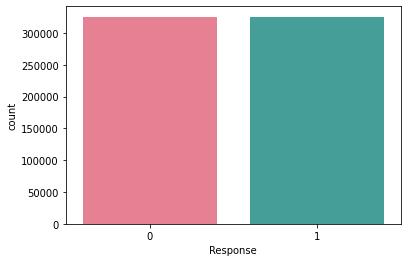

In [112]:
from imblearn.over_sampling import RandomOverSampler

randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [113]:
print('Length of columns pre sample {}'.format(len(X)))
print('Length of columns post sample {}'.format(len(X_new)))

Length of columns pre sample 370789
Length of columns post sample 651268


# **Training and Testing sets**

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size= 0.2, random_state=0)

In [115]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(521014, 9) (130254, 9) (521014,) (130254,)


In [116]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Model Development**

## Logistic Regression

In [117]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

In [118]:
model=LogisticRegression()
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.784405853179173
ROC_AUC Score: 0.8334162776148739


In [119]:
AUC_LR1= roc_auc_score(y_test, lr_probability)
print(AUC_LR1)

0.8191221981104078


[[38755 26548]
 [ 1534 63417]]


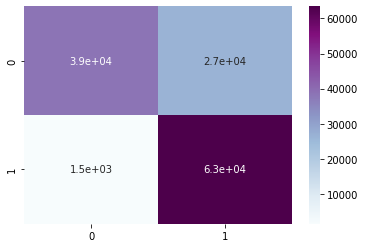

In [120]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [121]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     40289
           1       0.98      0.70      0.82     89965

    accuracy                           0.78    130254
   macro avg       0.78      0.83      0.78    130254
weighted avg       0.86      0.78      0.79    130254



## K-Nearest Neighbours

In [122]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train,y_train)

trainscoreKNN =  KNNmodel.score(X_train, y_train)
testscoreKNN =  KNNmodel.score(X_test, y_test) 

In [123]:
y_predKNNTest =  KNNmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predKNNTest),'\n')
print(confusion_matrix(y_test, y_predKNNTest))

 f1 score:  0.8794890268233208 

[[49380 15923]
 [ 1473 63478]]


In [124]:
probabilityValues = KNNmodel.predict_proba(X_test)[:,1]

In [125]:
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

0.927662933250557


[[49380 15923]
 [ 1473 63478]]


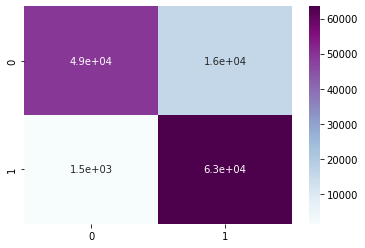

In [126]:
cmknn=confusion_matrix(y_test,y_predKNNTest)
print(cmknn)
sns.heatmap(cmknn,annot=True,cmap='BuPu')

In [127]:
print(classification_report(y_predKNNTest,y_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     50853
           1       0.98      0.80      0.88     79401

    accuracy                           0.87    130254
   macro avg       0.87      0.89      0.86    130254
weighted avg       0.89      0.87      0.87    130254



## Decision Tree

In [140]:
DTmodel=  DecisionTreeClassifier(criterion = 'entropy',splitter = 'random',max_depth=10)  
DTmodel.fit(X_train, y_train)

trainscoreDT =  DTmodel.score(X_train, y_train)
testscoreDT =  DTmodel.score(X_test, y_test)

In [141]:
y_predDTTest =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predDTTest),'\n')
print(confusion_matrix(y_test, y_predDTTest))

 f1 score:  0.8209760533494997 

[[42738 22565]
 [ 4012 60939]]


In [142]:
print(classification_report(y_test, y_predDTTest))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76     65303
           1       0.73      0.94      0.82     64951

    accuracy                           0.80    130254
   macro avg       0.82      0.80      0.79    130254
weighted avg       0.82      0.80      0.79    130254



In [143]:
probabilityValues = DTmodel.predict_proba(X_test)[:,1]
#Calculate AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

0.8484578959036713


[[42738 22565]
 [ 4012 60939]]


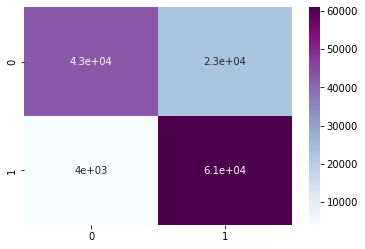

In [144]:
cmdt=confusion_matrix(y_test,y_predDTTest)
print(cmdt)
sns.heatmap(cmdt,annot=True,cmap='BuPu')

## Random Forest

In [145]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_predRF = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



acc_rf=accuracy_score(y_test,y_predRF)
recall_rf=recall_score(y_test,y_predRF)
precision_rf=precision_score(y_test,y_predRF)
f1score_rf=f1_score(y_test,y_predRF)

print(accuracy_score(y_predRF,y_test))


0.9568919188662153


In [146]:
AUC_RF=roc_auc_score(y_test, RF_probability)
print("ROC_AUC Score:",AUC_RF)

ROC_AUC Score: 0.9996411509514698


[[59764    76]
 [ 5539 64875]]


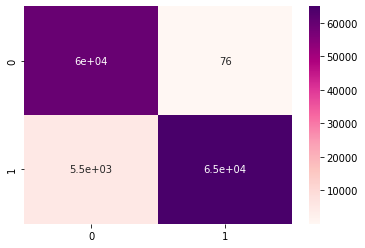

In [147]:
cmrf=confusion_matrix(y_predRF,y_test)
print(cmrf)
sns.heatmap(cmrf,annot=True,cmap='RdPu')

In [148]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     65303
           1       0.92      1.00      0.96     64951

    accuracy                           0.96    130254
   macro avg       0.96      0.96      0.96    130254
weighted avg       0.96      0.96      0.96    130254



## XGBOOST

In [149]:
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predictXGB = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predictXGB)
recall_xgb=recall_score(y_test,y_predictXGB)
precision_xgb=precision_score(y_test,y_predictXGB)
f1score_xgb=f1_score(y_test,y_predictXGB)

AUC_xgb=roc_auc_score(y_test,XGB_probability)


print(accuracy_score(y_predictXGB,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.7983094569072735
ROC_AUC Score: 0.8560725317419691


In [150]:
print(classification_report(y_predictXGB,y_test))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77     47640
           1       0.93      0.73      0.82     82614

    accuracy                           0.80    130254
   macro avg       0.80      0.82      0.79    130254
weighted avg       0.83      0.80      0.80    130254



[[43336 21967]
 [ 4304 60647]]


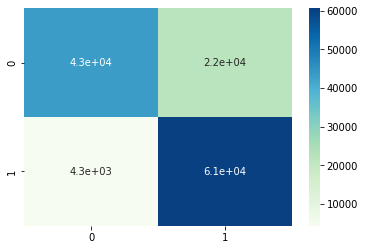

In [151]:
cmXGB=confusion_matrix(y_test,y_predictXGB)
print(cmXGB)
sns.heatmap(cmXGB,annot=True,cmap='GnBu')

## Visualizing splitting decision of Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

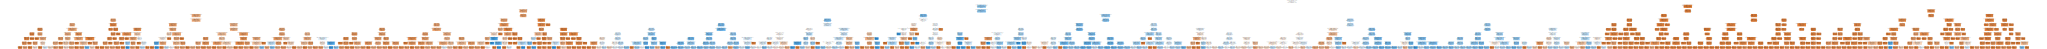

In [155]:
graph = Source(tree.export_graphviz(DTmodel, out_file=None
   , feature_names=X_new.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))